In [4]:

# run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
# load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'


loaded my modules
loaded my own functions


In [5]:
### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)

loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [6]:
### Set file names
# hisFilePath='../data/raw/'
hisFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output'

In [ ]:
# define function for calculating spatial mean
def indexMeanMetric(input,iRange,jRange):
    iRange=range(iRange[0],iRange[1]+1)
    jRange=range(jRange[0],jRange[1]+1)
    output = input.isel(eta_rho=iRange, xi_rho=jRange).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output


In [16]:
import glob
chunks = {'ocean_time':1}
filelist = glob.glob(hisFilePath+'outer_his_0800*.nc')


for files in filelist: 
    print(files)
    # filelist.append(files)
ds = xr.open_mfdataset(filelist,chunks, data_vars='minimal',compat='override',coords='minimal',parallel=True, join='right') 

../data/raw/roms_fwd_outer0_08005.nc
../data/raw/roms_fwd_outer1_08005.nc
../data/raw/roms_fwd_outer0_08009.nc
../data/raw/roms_fwd_outer1_08009.nc


In [ ]:
# load to some variables to memory:
ssh = ds.zeta.load()
sst = ds.isel(s_rho=-1).load()

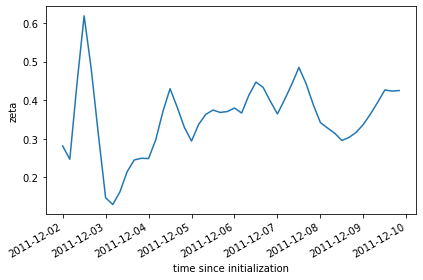

In [178]:
ssh_metric.plot()
plt.tight_layout()

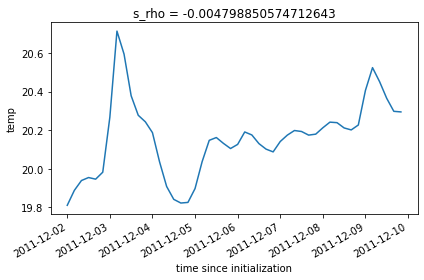

In [176]:
sst_metric.plot()
plt.tight_layout()